## **Downloading the libraries:**

In [0]:
#First and second line : we always obtain updated functions, classes, methods..   (last version) from a specific library
#Third line : memorize the graph in the notebook file
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline 

In [0]:
from fastai.vision import *
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Obtaining data:**

In [0]:
#Before to run the two lines of code drag and drop the kaggle.json file into the working directory (/content)--->default path when you open Colab
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
path = Config.data_path()/'Fraud'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/Fraud')

In [0]:
!chmod 600 /root/.kaggle/kaggle.json  #to fix the warning "Your Kaggle API key is readable by other users on this system..."

In [0]:
!kaggle competitions list --csv # we test if we are connected to Kaggle API. We print the list of opened competitions

ref,deadline,category,reward,teamCount,userHasEntered
digit-recognizer,2030-01-01 00:00:00,Getting Started,Knowledge,2378,False
titanic,2030-01-01 00:00:00,Getting Started,Knowledge,17925,False
house-prices-advanced-regression-techniques,2030-01-01 00:00:00,Getting Started,Knowledge,4419,False
connectx,2030-01-01 00:00:00,Getting Started,Knowledge,310,False
nlp-getting-started,2030-01-01 00:00:00,Getting Started,Kudos,2830,True
competitive-data-science-predict-future-sales,2020-12-31 23:59:00,Playground,Kudos,6241,False
halite,2020-06-30 23:59:00,Featured,Kudos,0,False
m5-forecasting-accuracy,2020-06-30 23:59:00,Featured,"$50,000",2298,False
m5-forecasting-uncertainty,2020-06-30 23:59:00,Featured,"$50,000",211,False
jigsaw-multilingual-toxic-comment-classification,2020-06-22 23:59:00,Featured,"$50,000",508,False
tweet-sentiment-extraction,2020-06-16 23:59:00,Featured,"$15,000",373,False
imet-2020-fgvc7,2020-05-28 23:59:00,Research,Knowledge,22,False
abstraction-and-reasoning-challenge,

In [0]:
!kaggle competitions download -c ieee-fraud-detection -p {path} --force #we download the file in our path

  0% 0.00/3.26M [00:00<?, ?B/s]
100% 3.26M/3.26M [00:00<00:00, 112MB/s]
 99% 58.0M/58.3M [00:00<00:00, 132MB/s]
100% 58.3M/58.3M [00:00<00:00, 168MB/s]
  0% 0.00/3.21M [00:00<?, ?B/s]
100% 3.21M/3.21M [00:00<00:00, 107MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 160MB/s]
 84% 44.0M/52.2M [00:00<00:00, 78.6MB/s]
100% 52.2M/52.2M [00:00<00:00, 118MB/s] 


In [0]:
!ls {path}  #the list of the files into the path directory (/root/.fastai/data/Fraud)

sample_submission.csv	   test_transaction.csv      train_transaction.csv
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
test_identity.csv	   train_identity.csv
test_identity.csv.zip	   train_identity.csv.zip


In [0]:
for file in os.listdir(path):    #We decompressing all zip in /root/.fastai/data/Fraud in one time!!!
  !python -m zipfile -e {path}/{file} /root/.fastai/data/Fraud 

  #Gives errors beacause i have already unzipped files intp my path

Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/zipfile.py", line 2060, in <module>
    main()
  File "/usr/lib/python3.6/zipfile.py", line 2031, in main
    with ZipFile(args[1], 'r') as zf:
  File "/usr/lib/python3.6/zipfile.py", line 1131, in __init__
    self._RealGetContents()
  File "/usr/lib/python3.6/zipfile.py", line 1198, in _RealGetContents
    raise BadZipFile("File is not a zip file")
__main__.BadZipFile: File is not a zip file
Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/zipfile.py", line 2060, in <module>
    main()
  File "/usr/lib/python3.6/zipfile.py", line 2031, in main
   

In [0]:
!ls {path}

sample_submission.csv	   test_transaction.csv      train_transaction.csv
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
test_identity.csv	   train_identity.csv
test_identity.csv.zip	   train_identity.csv.zip


In [0]:
!ls -s {path}  #We have big files (about 0.6 gb test set, 0.67 gb training set)

total 1444176
  5940 sample_submission.csv	   53416 test_transaction.csv.zip
  1164 sample_submission.csv.zip   25908 train_identity.csv
 25196 test_identity.csv	    3344 train_identity.csv.zip
  3288 test_identity.csv.zip	  667340 train_transaction.csv
598828 test_transaction.csv	   59752 train_transaction.csv.zip


## **Creating table**

In [0]:
#We convert train_transation.csv to dataframe
df_trans_train = pd.read_csv(path/'train_transaction.csv')
df_trans_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_trans_train.iloc[:15,:]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.000000,354.000000,0.000000,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.

In [0]:
df_ident_train =pd.read_csv(path/'train_identity.csv')
df_ident_train.head() 

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [0]:
df_trans_test = pd.read_csv(path/'test_transaction.csv')

In [0]:
df_indent_test = pd.read_csv(path/'test_identity.csv')

In [0]:
df_submition = pd.read_csv(path/'sample_submission.csv')

In [0]:
df_train_j = pd.merge(df_trans_train, df_ident_train, on='TransactionID', how='left')

In [0]:
df_train_j.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [0]:
df_test_j = pd.merge(df_trans_test, df_indent_test, on='TransactionID', how='left')

In [0]:
df_test_j[:5]

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Create function to rename df_test_j dataframe
def renaming_column(x):
    if x[:2]  == "id":
        return "id" + "_" +x[3:] 
    return x

In [0]:
df_test_j.columns =[renaming_column(col) for col in df_test_j.columns ]

In [0]:
df_test_j[:5]

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory data analisys**

In [0]:
#Check number of columns with null value in df_train_j
print(f'There are {df_train_j.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


### ID features

id_01 - id_11 --> continuous variables

id_12 - id_38 --> categorical

last two column --> categorical





/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


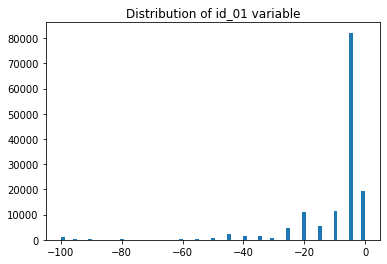

In [0]:
#77 not unique negative variables
plt.hist(df_train_j['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

In [0]:
# relative frequence for value--> 88% null value, 10% -->zero values
df_train_j['id_03'].value_counts(dropna=False, normalize=True).head(10)

 NaN    0.887689
 0.0    0.108211
 1.0    0.001461
 3.0    0.001131
 2.0    0.000713
 5.0    0.000185
 4.0    0.000169
 6.0    0.000108
-5.0    0.000056
-6.0    0.000052
Name: id_03, dtype: float64

In [0]:
#76% null values
df_train_j['id_11'].value_counts(dropna=False, normalize=True).head()

NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
Name: id_11, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


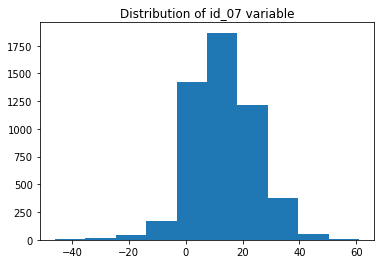

In [0]:
plt.hist(df_train_j['id_07']);
plt.title('Distribution of id_07 variable');

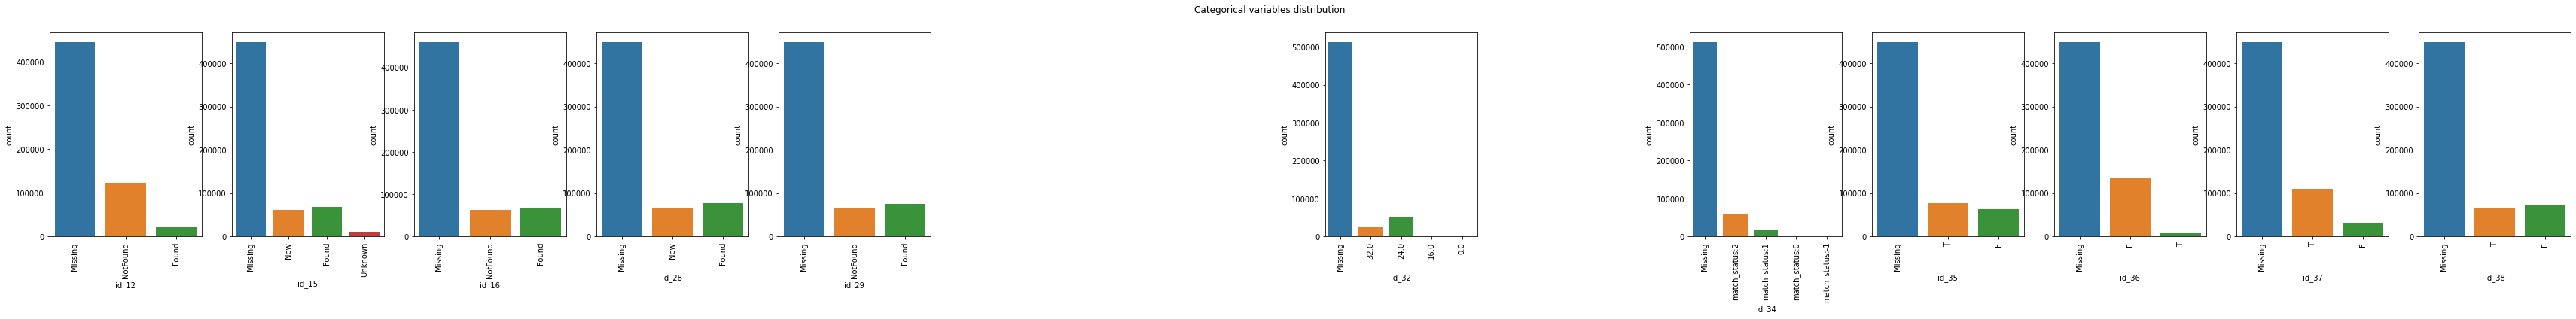

In [0]:
categorical = ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
fig,ax = plt.subplots(1,14, figsize = (60,5))
fig.suptitle("Categorical variables distribution")
i = 0
List_too_value = []
for variable, subplot in zip(categorical, ax.flatten()):
    
    if  len(df_train_j[variable].unique().tolist()) >5:  #If we have more than 5 values in a specific categorical variable, we don't plot it!
      fig.delaxes(ax[i])
      i = i + 1
      List_too_value.append(variable)
      continue
    i = i +1
    sns.countplot(df_train_j[variable].fillna('Missing'), ax = subplot)
    #sns.countplot(df_train_j[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



In [0]:
#Categorical variables in df_train_j with too many values!!! 
List_too_value

['id_30', 'id_31', 'id_33']

[Text(0, 0, 'Missing'),
 Text(0, 0, 'Android 7.0'),
 Text(0, 0, 'iOS 11.1.2'),
 Text(0, 0, 'Mac OS X 10_11_6'),
 Text(0, 0, 'Windows 10'),
 Text(0, 0, 'Android'),
 Text(0, 0, 'Linux'),
 Text(0, 0, 'iOS 11.0.3'),
 Text(0, 0, 'Mac OS X 10_7_5'),
 Text(0, 0, 'Mac OS X 10_12_6'),
 Text(0, 0, 'Mac OS X 10_13_1'),
 Text(0, 0, 'iOS 11.1.0'),
 Text(0, 0, 'Mac OS X 10_9_5'),
 Text(0, 0, 'Windows 7'),
 Text(0, 0, 'Windows 8.1'),
 Text(0, 0, 'Mac'),
 Text(0, 0, 'iOS 10.3.3'),
 Text(0, 0, 'Mac OS X 10.12'),
 Text(0, 0, 'Mac OS X 10_10_5'),
 Text(0, 0, 'Mac OS X 10_11_5'),
 Text(0, 0, 'iOS 9.3.5'),
 Text(0, 0, 'Android 5.1.1'),
 Text(0, 0, 'Android 7.1.1'),
 Text(0, 0, 'Android 6.0'),
 Text(0, 0, 'iOS 10.3.1'),
 Text(0, 0, 'Mac OS X 10.9'),
 Text(0, 0, 'iOS 11.1.1'),
 Text(0, 0, 'Windows Vista'),
 Text(0, 0, 'iOS 10.3.2'),
 Text(0, 0, 'iOS 11.0.2'),
 Text(0, 0, 'Mac OS X 10.11'),
 Text(0, 0, 'Android 8.0.0'),
 Text(0, 0, 'iOS 10.2.0'),
 Text(0, 0, 'iOS 10.2.1'),
 Text(0, 0, 'iOS 11.0.0'),
 Text(0, 

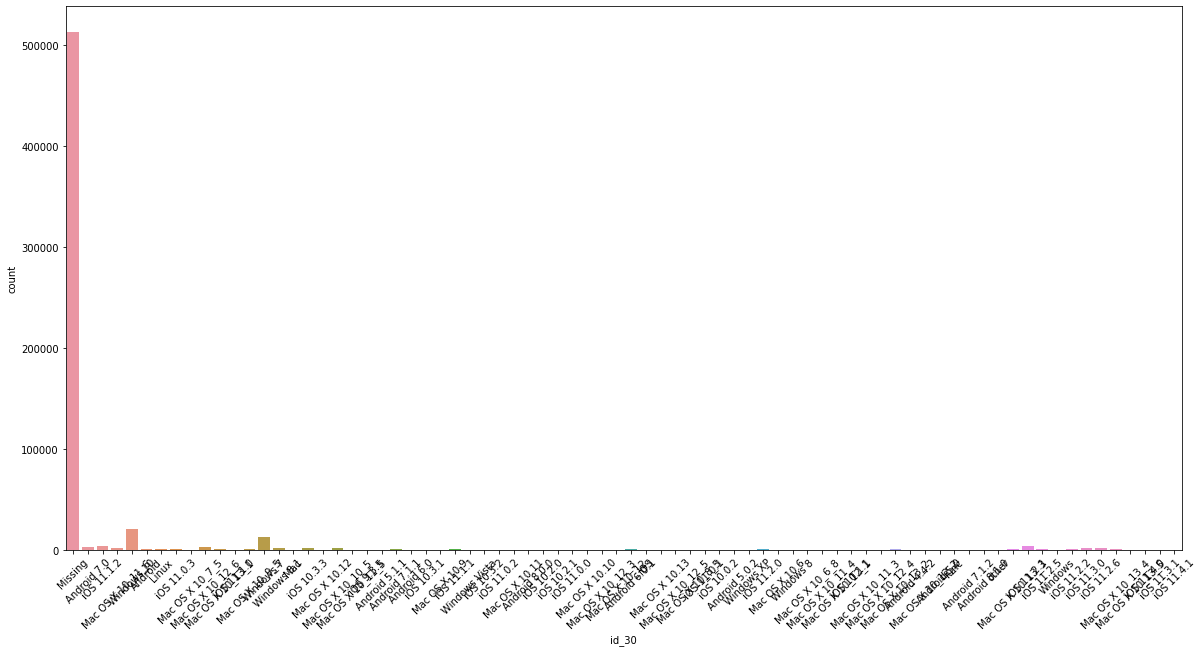

In [0]:
plt.figure(figsize=(20,10)) #lot of missing here!!!

chart = sns.countplot(df_train_j['id_30'].fillna('Missing'))

chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

[Text(0, 0, 'Missing'),
 Text(0, 0, 'samsung browser 6.2'),
 Text(0, 0, 'mobile safari 11.0'),
 Text(0, 0, 'chrome 62.0'),
 Text(0, 0, 'chrome 62.0 for android'),
 Text(0, 0, 'edge 15.0'),
 Text(0, 0, 'mobile safari generic'),
 Text(0, 0, 'chrome 49.0'),
 Text(0, 0, 'chrome 61.0'),
 Text(0, 0, 'edge 16.0'),
 Text(0, 0, 'safari generic'),
 Text(0, 0, 'edge 14.0'),
 Text(0, 0, 'chrome 56.0 for android'),
 Text(0, 0, 'firefox 57.0'),
 Text(0, 0, 'chrome 54.0 for android'),
 Text(0, 0, 'mobile safari uiwebview'),
 Text(0, 0, 'chrome'),
 Text(0, 0, 'chrome 62.0 for ios'),
 Text(0, 0, 'firefox'),
 Text(0, 0, 'chrome 60.0 for android'),
 Text(0, 0, 'mobile safari 10.0'),
 Text(0, 0, 'chrome 61.0 for android'),
 Text(0, 0, 'ie 11.0 for desktop'),
 Text(0, 0, 'ie 11.0 for tablet'),
 Text(0, 0, 'mobile safari 9.0'),
 Text(0, 0, 'chrome generic'),
 Text(0, 0, 'other'),
 Text(0, 0, 'chrome 59.0 for android'),
 Text(0, 0, 'firefox 56.0'),
 Text(0, 0, 'android webview 4.0'),
 Text(0, 0, 'chrome 55.0

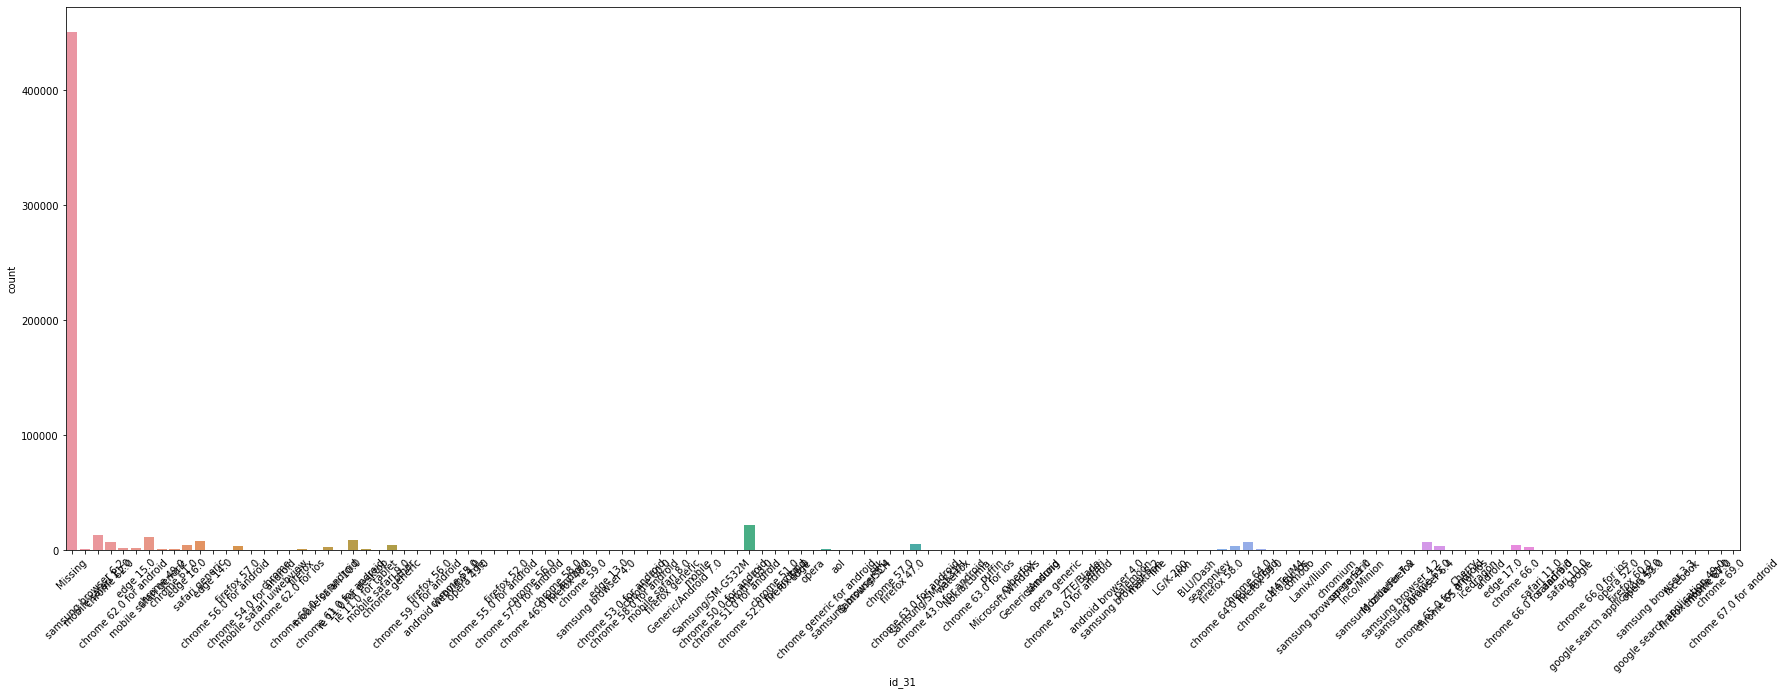

In [0]:
plt.figure(figsize=(30,10)) #lot of missing here!!!

chart = sns.countplot(df_train_j['id_31'].fillna('Missing'))

chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

[Text(0, 0, 'Missing'),
 Text(0, 0, '2220x1080'),
 Text(0, 0, '1334x750'),
 Text(0, 0, '1280x800'),
 Text(0, 0, '1366x768'),
 Text(0, 0, '1920x1080'),
 Text(0, 0, '1680x1050'),
 Text(0, 0, '1136x640'),
 Text(0, 0, '5120x2880'),
 Text(0, 0, '2880x1800'),
 Text(0, 0, '1920x1200'),
 Text(0, 0, '2560x1600'),
 Text(0, 0, '2048x1536'),
 Text(0, 0, '1024x768'),
 Text(0, 0, '1280x720'),
 Text(0, 0, '2560x1440'),
 Text(0, 0, '2208x1242'),
 Text(0, 0, '2001x1125'),
 Text(0, 0, '1440x900'),
 Text(0, 0, '1600x900'),
 Text(0, 0, '2672x1440'),
 Text(0, 0, '1280x1024'),
 Text(0, 0, '960x540'),
 Text(0, 0, '2732x2048'),
 Text(0, 0, '2436x1125'),
 Text(0, 0, '2048x1152'),
 Text(0, 0, '2960x1440'),
 Text(0, 0, '1024x600'),
 Text(0, 0, '855x480'),
 Text(0, 0, '4096x2304'),
 Text(0, 0, '2160x1440'),
 Text(0, 0, '2562x1442'),
 Text(0, 0, '801x480'),
 Text(0, 0, '2736x1824'),
 Text(0, 0, '3441x1440'),
 Text(0, 0, '2880x1620'),
 Text(0, 0, '3840x2160'),
 Text(0, 0, '1638x922'),
 Text(0, 0, '1280x768'),
 Text

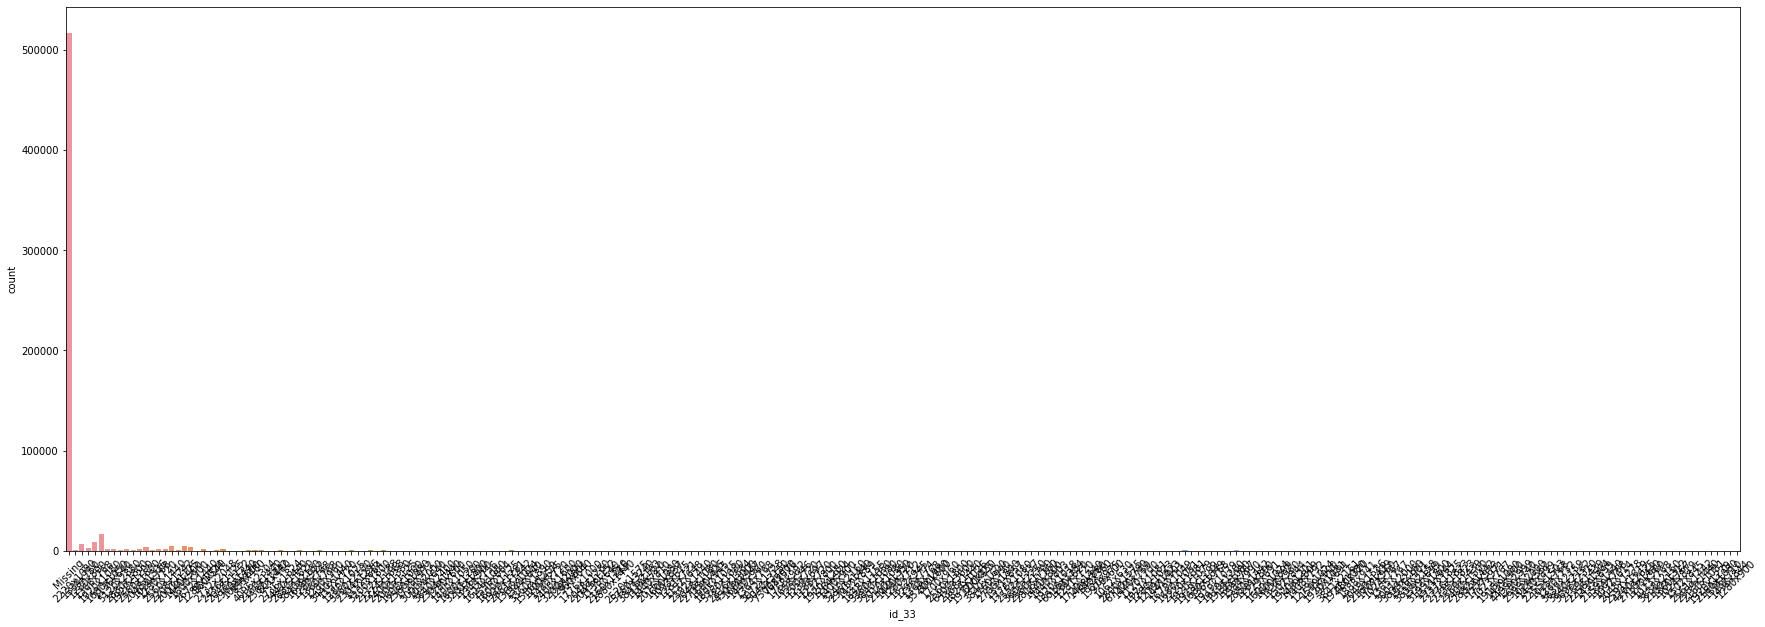

In [0]:
plt.figure(figsize=(30,10)) #lot of missing here!!!

chart = sns.countplot(df_train_j['id_33'].fillna('Missing'))

chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

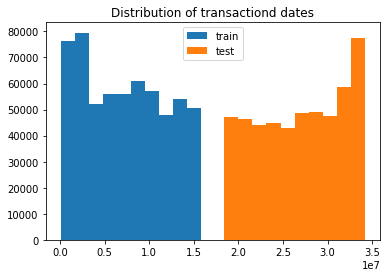

In [0]:
plt.hist(df_train_j['TransactionDT'], label='train');
plt.hist(df_test_j['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

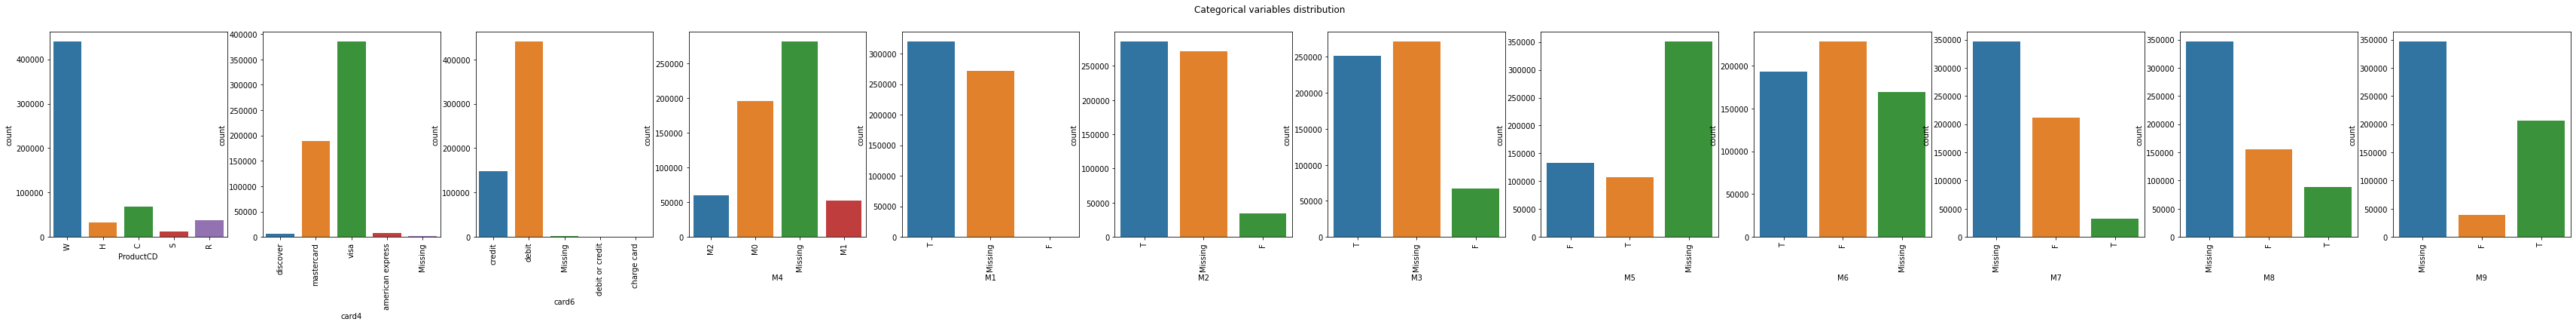

In [0]:
other_cat_vars = ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

fig,ax = plt.subplots(1,12, figsize = (60,5))
fig.suptitle("Categorical variables distribution")
i = 0
#List_too_value = []
for variable, subplot in zip(other_cat_vars, ax.flatten()):
    
    #if  len(df_train_j[variable].unique().tolist()) >5:  #If we have more than 5 values in a specific categorical variable, we don't plot it!
     # fig.delaxes(ax[i])
      #i = i + 1
      #List_too_value.append(variable)
      #continue
    i = i +1
    sns.countplot(df_train_j[variable].fillna('Missing'), ax = subplot)
    #sns.countplot(df_train_j[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [0]:
#printing the percentace of null values for each variable
percent_missing = df_train_j.isnull().sum() * 100 / len(df_train_j)
missing_value_df = pd.DataFrame({'column_name': df_train_j.columns,
                                 'percent_missing': percent_missing})

In [0]:
missing_value_df.sort_values(by=['percent_missing'], inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
missing_value_df[:115]  #Ee have about 111 features with null value percentage <1% (on total nomber of rows of the dataset)

,column_name,percent_missing
TransactionID,TransactionID,0.000000
C14,C14,0.000000
C13,C13,0.000000
C12,C12,0.000000
C11,C11,0.000000
C10,C10,0.000000
C8,C8,0.000000
C7,C7,0.000000
C6,C6,0.000000
C5,C5,0.000000


## **Feature engineering**

In [0]:
#We calculate some new feature best on aggregation on best features (features with low or zero null values)

#Transaction/card_1_mean , Transaction/card_4_mean ,Transaction/card_1_std , Transaction/card_4_std 

df_train_j['Perc_TransactionAmt_to_mean_card1'] =  df_train_j['TransactionAmt']/df_train_j.groupby(['card1'])['TransactionAmt'].transform('mean')   # (transaction row i) / mean(all transactions for card1 value row i)

df_train_j['Perc_TransactionAmt_to_mean_card4'] =  df_train_j['TransactionAmt']/df_train_j.groupby(['card4'])['TransactionAmt'].transform('mean')    

df_train_j['Perc_TransactionAmt_to_std_card1'] =  df_train_j['TransactionAmt']/df_train_j.groupby(['card1'])['TransactionAmt'].transform('std')      # (transaction row i) / std(all transactions for card4 value of transaction row i)

df_train_j['Perc_TransactionAmt_to_std_card4'] =  df_train_j['TransactionAmt']/df_train_j.groupby(['card4'])['TransactionAmt'].transform('std')

#same new features on test set...

df_test_j['Perc_TransactionAmt_to_mean_card1'] =  df_test_j['TransactionAmt']/df_test_j.groupby(['card1'])['TransactionAmt'].transform('mean')   

df_test_j['Perc_TransactionAmt_to_mean_card4'] =  df_test_j['TransactionAmt']/df_test_j.groupby(['card4'])['TransactionAmt'].transform('mean')    

df_test_j['Perc_TransactionAmt_to_std_card1'] =  df_test_j['TransactionAmt']/df_test_j.groupby(['card1'])['TransactionAmt'].transform('std')

df_test_j['Perc_TransactionAmt_to_std_card4'] =  df_test_j['TransactionAmt']/df_test_j.groupby(['card4'])['TransactionAmt'].transform('std')


In [0]:
#id_02/card_1_mean and id_02/card_4_mean ,id_02/card_1_std and id_02/card_4_std

df_train_j['Perc_id_02_to_mean_card1'] =  df_train_j['id_02']/df_train_j.groupby(['card1'])['id_02'].transform('mean')   

df_train_j['Perc_id_02_to_mean_card4'] =  df_train_j['id_02']/df_train_j.groupby(['card4'])['id_02'].transform('mean')    

df_train_j['Perc_id_02_to_std_card1'] =  df_train_j['id_02']/df_train_j.groupby(['card1'])['id_02'].transform('std')      

df_train_j['Perc_id_02_to_std_card4'] =  df_train_j['id_02']/df_train_j.groupby(['card4'])['id_02'].transform('std')

#...and on test set

df_test_j['Perc_id_02_to_mean_card1'] =  df_test_j['id_02']/df_test_j.groupby(['card1'])['id_02'].transform('mean')   

df_test_j['Perc_id_02_to_mean_card4'] =  df_test_j['id_02']/df_test_j.groupby(['card4'])['id_02'].transform('mean')    

df_test_j['Perc_id_02_to_std_card1'] =  df_test_j['id_02']/df_test_j.groupby(['card1'])['id_02'].transform('std')      

df_test_j['Perc_id_02_to_std_card4'] =  df_test_j['id_02']/df_test_j.groupby(['card4'])['id_02'].transform('std')

In [0]:
#D15/card_1_mean and D15/card_4_mean ,D15/card_1_std and D15/card_4_std

df_train_j['Perc_D15_to_mean_card1'] =  df_train_j['D15']/df_train_j.groupby(['card1'])['D15'].transform('mean')   

df_train_j['Perc_D15_to_mean_card4'] =  df_train_j['D15']/df_train_j.groupby(['card4'])['D15'].transform('mean')    

df_train_j['Perc_D15_to_std_card1'] =  df_train_j['D15']/df_train_j.groupby(['card1'])['D15'].transform('std')      

df_train_j['Perc_D15_to_std_card4'] =  df_train_j['D15']/df_train_j.groupby(['card4'])['D15'].transform('std')

#...and on test set

df_test_j['Perc_D15_to_mean_card1'] =  df_test_j['D15']/df_test_j.groupby(['card1'])['D15'].transform('mean')   

df_test_j['Perc_D15_to_mean_card4'] =  df_test_j['D15']/df_test_j.groupby(['card4'])['D15'].transform('mean')    

df_test_j['Perc_D15_to_std_card1'] =  df_test_j['D15']/df_test_j.groupby(['card1'])['D15'].transform('std')      

df_test_j['Perc_D15_to_std_card4'] =  df_test_j['D15']/df_test_j.groupby(['card4'])['D15'].transform('std')

In [0]:
#D15/addr1_mean and D15/addr2_mean ,D15/addr1_std and D15/addr2_std

df_train_j['Perc_D15_to_mean_addr1'] =  df_train_j['D15']/df_train_j.groupby(['addr1'])['D15'].transform('mean')   

df_train_j['Perc_D15_to_mean_addr2'] =  df_train_j['D15']/df_train_j.groupby(['addr2'])['D15'].transform('mean')    

df_train_j['Perc_D15_to_std_addr1'] =  df_train_j['D15']/df_train_j.groupby(['addr1'])['D15'].transform('std')      

df_train_j['Perc_D15_to_std_addr2'] =  df_train_j['D15']/df_train_j.groupby(['addr2'])['D15'].transform('std')

#...and on test set

df_test_j['Perc_D15_to_mean_addr1'] =  df_test_j['D15']/df_test_j.groupby(['addr1'])['D15'].transform('mean')   

df_test_j['Perc_D15_to_mean_addr2'] =  df_test_j['D15']/df_test_j.groupby(['addr2'])['D15'].transform('mean')    

df_test_j['Perc_D15_to_std_addr1'] =  df_test_j['D15']/df_test_j.groupby(['addr1'])['D15'].transform('std')      

df_test_j['Perc_D15_to_std_addr2'] =  df_test_j['D15']/df_test_j.groupby(['addr2'])['D15'].transform('std')


In [0]:
#Split email domain in more fields

df_train_j[['P_emaildomain_1','P_emaildomain_2','P_emaildomain_3']] =  df_train_j['P_emaildomain'].str.split('.', expand=True)

df_train_j[['R_emaildomain_1','R_emaildomain_2','R_emaildomain_3']] =  df_train_j['R_emaildomain'].str.split('.', expand=True)

#...and on test set

df_test_j[['P_emaildomain_1','P_emaildomain_2','P_emaildomain_3']] =  df_test_j['P_emaildomain'].str.split('.', expand=True) 

df_test_j[['R_emaildomain_1','R_emaildomain_2','R_emaildomain_3']] =  df_test_j['R_emaildomain'].str.split('.', expand=True)  



##**Prepare data for modelling**

In [0]:
# Find columns with only one kind of value
cols_one_value = [col for col in df_train_j.columns if df_train_j[col].nunique() <=1 ]
#And fro test set
cols_one_value_test = [col for col in df_test_j.columns if df_test_j[col].nunique() <=1 ]

In [0]:
# Find columns with more than 90% of null value on total rows
cols_many_nulls = [col for col in df_train_j.columns if df_train_j[col].isnull().sum()/df_train_j.shape[0] > 0.9 ]
# Same on Test set
cols_many_nulls_test = [col for col in df_test_j.columns if df_test_j[col].isnull().sum()/df_test_j.shape[0] > 0.9 ]

In [0]:
# Find columns with relative frequency of a specific value >90%
cols_big_values = [col for col in df_train_j.columns if df_train_j[col].value_counts(dropna=False, normalize = True).values[0] >0.9]
# Same on Test set
cols_big_values_test = [col for col in df_test_j.columns if df_test_j[col].value_counts(dropna=False, normalize = True).values[0] >0.9]

In [0]:
# Find the columns to drop
columns_to_drop = list(set(cols_one_value + cols_one_value_test + cols_many_nulls + cols_many_nulls_test + cols_big_values + cols_big_values_test ))

In [0]:
#We remove our target variable
columns_to_drop.remove("isFraud")

In [0]:
#Remove not useful columns from Training set and Test set

df_train_j = df_train_j.drop(columns_to_drop, axis = 1)
df_test_j = df_test_j.drop(columns_to_drop, axis = 1)

In [0]:
df_train_j[:5]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Perc_TransactionAmt_to_mean_card1,Perc_TransactionAmt_to_mean_card4,Perc_TransactionAmt_to_std_card1,Perc_TransactionAmt_to_std_card4,Perc_id_02_to_mean_card1,Perc_id_02_to_mean_card4,Perc_id_02_to_std_card1,Perc_id_02_to_std_card4,Perc_D15_to_mean_card1,Perc_D15_to_mean_card4,Perc_D15_to_std_card1,Perc_D15_to_std_card4,Perc_D15_to_mean_addr1,Perc_D15_to_mean_addr2,Perc_D15_to_std_addr1,Perc_D15_to_std_addr2,P_emaildomain_1,P_emaildomain_2,R_emaildomain_1,R_emaildomain_2
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.194640,0.257761,0.184566,0.170233,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,

In [0]:
#We copy our cleaned dataset because we need to convert categorical variables to numeric in a specific way
df_train_j_v2 = df_train_j
df_test_j_v2 = df_test_j

cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
#Conversion categorical variables to numeric
for col in cat_cols:
    if col in df_train_j.columns:
        le = LabelEncoder()
        le.fit(list(df_train_j[col].astype(str).values) + list(df_test_j[col].astype(str).values))
        df_train_j_v2[col] = le.transform(list(df_train_j[col].astype(str).values))
        df_test_j_v2[col] = le.transform(list(df_test_j[col].astype(str).values)) 

In [0]:
df_train_j_v2[:5]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Perc_TransactionAmt_to_mean_card1,Perc_TransactionAmt_to_mean_card4,Perc_TransactionAmt_to_std_card1,Perc_TransactionAmt_to_std_card4,Perc_id_02_to_mean_card1,Perc_id_02_to_mean_card4,Perc_id_02_to_std_card1,Perc_id_02_to_std_card4,Perc_D15_to_mean_card1,Perc_D15_to_mean_card4,Perc_D15_to_std_card1,Perc_D15_to_std_card4,Perc_D15_to_mean_addr1,Perc_D15_to_mean_addr2,Perc_D15_to_std_addr1,Perc_D15_to_std_addr2,P_emaildomain_1,P_emaildomain_2,R_emaildomain_1,R_emaildomain_2
0,2987000,0,86400,68.5,4,4248,501,50,1,42,1,215,80,19.0,32,32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1,1,1,2,0,1,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,55,28,3,2,127,568,547,2,2,86,136,6,461,4,2,2,2,2,2,2740,0.194640,0.257761,0.184566,0.170233,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25,7,25,7
1,2987001,0,86401,29.0,4,9979,304,50,2,2,1,225,80,NaN,16,32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2,2,2,0,1,1,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [0]:
#Create X and y
X = df_train_j.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = df_train_j.sort_values('TransactionDT')['isFraud']

#..and on Test set:

X_test = df_test_j.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = df_test_j.drop(['TransactionDT', 'TransactionID'], axis=1)

#test = test[["TransactionDT", 'TransactionID']]



In [0]:
#Cleaning: [inf, -inf] convert to Nan

#def clean_inf_nan(df):
#    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
#X = clean_inf_nan(X)
#X_test = clean_inf_nan(X_test)

In [0]:
#Substitute Nan with 0
for col in X.columns:
  X[col] = X[col].fillna(0)

In [0]:
for col in X_test:
  X_test[col] = X_test[col].fillna(0)

In [0]:
#Fast way to round!!!
def faster_round(df, decimals):
    rounded = np.round(df.values, decimals)
    return pd.DataFrame(rounded, columns=df.columns, index=df.index)

In [0]:
#Max number of digit: 4
faster_round(X,4)
faster_round(X_test,4)

KeyboardInterrupt: ignored

## **Machine Learning / Deep Learning Models**

In [0]:
#Decision Tree model:

#r_state= 14
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=r_state) # We split the dataset randomly  
                                                                                # in Training Set : 75% and Test Set 25%

In [0]:
#estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state) # We inizialize a Decision Tree estimator

In [0]:
#estimator.fit(X_train2, y_train2) # We fit/learn from features and the OUTPUT column (we have a supervised model)